# Gender Prediction using Sound

GitHub Repository: https://github.com/skhiearth/Gender-Prediction-using-Sound

Analysing the gender distribution of children's book writers and use sound to match names to gender. Inspired by the DataCamp project of the same name by Tufool Alnuaimi.

Using the Python package Fuzzy to find out the genders of authors that have appeared in the New York Times Best Seller list for Children's Picture books. First, using fuzzy (sound) name matching, we search for author names in a dataset provided by the US Social Security Administration that contains names and genders of all individuals who have applied for Social Security Cards. Next, we'll aggregate the author dataset by including gender. Finally, we will use the new dataset to plot the gender distribution of children's picture books authors over time to get a better way to match names than spelling.

In [1]:
# Importing the required libraries
import fuzzy as fz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading in dataset for the New York Times Best Seller list for Children's Picture books
author_df = pd.read_csv('datasets/nytkids_yearly.csv', sep=';')
author_df.head(3)

,Year,Book Title,Author,Besteller this year
0,2017,DRAGONS LOVE TACOS,Adam Rubin,49
1,2017,THE WONDERFUL THINGS YOU WILL BE,Emily Winfield Martin,48
2,2017,THE DAY THE CRAYONS QUIT,Drew Daywalt,44


In [3]:
# Extracting the authors' first names
first_name = []
for name in author_df['Author']:
    first_name.append(name.split()[0])

# Adding first_name as a column to author_df
author_df['first_name'] = first_name
author_df.head(3)

,Year,Book Title,Author,Besteller this year,first_name
0,2017,DRAGONS LOVE TACOS,Adam Rubin,49,Adam
1,2017,THE WONDERFUL THINGS YOU WILL BE,Emily Winfield Martin,48,Emily
2,2017,THE DAY THE CRAYONS QUIT,Drew Daywalt,44,Drew


In [4]:
# Extracting the nysiis equivalent of the authors' first name
nysiis_name = []
for name in author_df['first_name']:
    nysiis_name.append(fz.nysiis(name))

# Adding nysiis_name as a column to author_df
author_df['nysiis_name'] = nysiis_name
author_df.head(3)

,Year,Book Title,Author,Besteller this year,first_name,nysiis_name
0,2017,DRAGONS LOVE TACOS,Adam Rubin,49,Adam,ADAN
1,2017,THE WONDERFUL THINGS YOU WILL BE,Emily Winfield Martin,48,Emily,ENALY
2,2017,THE DAY THE CRAYONS QUIT,Drew Daywalt,44,Drew,DR


In [5]:
# Reading in dataset containing unique NYSIIS versions of baby names
babies_df = pd.read_csv('datasets/babynames_nysiis.csv', sep=';')
babies_df.head(3)

,babynysiis,perc_female,perc_male
0,NaN,62.50,37.50
1,RAX,63.64,36.36
2,ESAR,44.44,55.56


Here, `perc_female` and `perc_male` are the percentage of times the name appeared as a female name and otherwise. We use these numeric values to assign a definitive gender to each NYSIIS version.

In [6]:
# Extracting the NYSIIS versions' definitive gender
gender = []
for gen in range(len(babies_df)):
    if(babies_df.perc_female[gen] > babies_df.perc_male[gen]):
        gender.append('F')
    elif(babies_df.perc_female[gen] < babies_df.perc_male[gen]):
        gender.append('M')
    else:
        gender.append('N')
        
# Adding gender as a column to babies_df
babies_df['gender'] = gender
babies_df.head(3)

,babynysiis,perc_female,perc_male,gender
0,NaN,62.50,37.50,F
1,RAX,63.64,36.36,F
2,ESAR,44.44,55.56,M


In [7]:
def locate_in_list(a_list, element):
    loc_of_name = a_list.index(element) if element in a_list else -1
    return(loc_of_name)

# Looping through author_df['nysiis_name'] and appending the gender of each author to author_gender.
author_gender = []
for name in author_df['nysiis_name']:
    index = locate_in_list(list(babies_df['babynysiis']), name)
    if index != -1:
        author_gender.append(babies_df['gender'][index])
    else:
        author_gender.append('Unknown')
        
# Adding author_gender to the author_df
author_df['author_gender'] = author_gender
author_df['author_gender'].value_counts()

F          395
M          191
Unknown      9
N            8
Name: author_gender, dtype: int64

In [8]:
# Creating a list of unique years, sorted in ascending order.
years = np.arange(2008, 2018, 1)

# Initializing lists
males_by_yr = []
females_by_yr = []
unknown_by_yr = []

# Looping through years to find the number of male, female and unknown authors per year
for year in years:
    females_by_yr.append(
        len(author_df[(author_df["author_gender"] == 'F') & (author_df['Year']==year)]))
    males_by_yr.append(
        len(author_df[(author_df["author_gender"] == 'M') & (author_df['Year']==year)]))
    unknown_by_yr.append(
        len(author_df[(author_df["author_gender"] == 'Unknown') & (author_df['Year']==year)]))

# Printing out yearly values to examine changes over time
data = np.array([males_by_yr, females_by_yr, unknown_by_yr])
headers= ['males', 'females', 'unknowns']
pd.DataFrame(data, headers, years)

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
males,8,19,27,21,21,11,21,18,25,20
females,15,45,48,51,46,51,34,30,32,43
unknowns,1,3,0,1,0,2,1,0,0,1


Text(0, 0.5, 'Number')

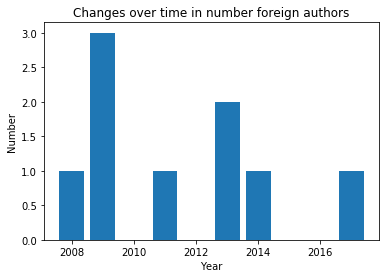

In [9]:
# Plotting the bar chart to visualise change over time in number foreign authors
plt.bar(years, unknown_by_yr)

plt.title('Changes over time in number foreign authors')
plt.xlabel('Year')
plt.ylabel('Number')

Text(0, 0.5, 'Number')

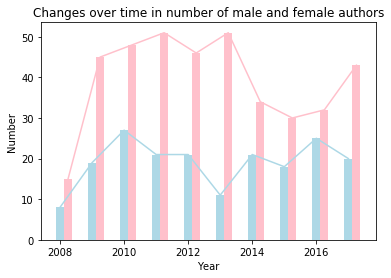

In [10]:
# Creating a new list, where 0.25 is added to each year
years_shifted = years + 0.25

# Plotting males_by_yr by year
plt.plot(years, males_by_yr, color = 'lightblue')
plt.bar(years, males_by_yr, width = 0.25, color = 'lightblue')

# Plotting females_by_yr by years_shifted
plt.plot(years_shifted, females_by_yr, color = 'pink')
plt.bar(years_shifted, females_by_yr, width = 0.25, color = 'pink')

plt.title('Changes over time in number of male and female authors')
plt.xlabel('Year')
plt.ylabel('Number')